max|Re Vx| = 4.65731402863 ; max|Re Vy| = 2.22493314611 ; max|Re Vz| = 6.26102659937
max|Im Vx| = 0.622963602428 ; max|Im Vy| = 0.428346159529 ; max|Im Vz| = 0.690464737337
6.56000400216 1.88099121304 -43.7491167669
max|Re Vx| = 4.65731402863 ; max|Re Vy| = 3.13645053061 ; max|Re Vz| = 5.26102672864
max|Im Vx| = 0.622963602428 ; max|Im Vy| = 0.418825065851 ; max|Im Vz| = 0.689956262783
5.68613377151 1.73803053942 -43.7491167669
max|Re Vx| = 3.74341526809e-16 ; max|Re Vy| = 0.999999870727 ; max|Re Vz| = 0.999999870727
max|Im Vx| = 2.85210355961e-15 ; max|Im Vy| = 0.0299955002025 ; max|Im Vz| = 0.0299955002025
1.0 6.66133814775e-16 -43.7491167669
max|Re Vx| = 0.000927029236652 ; max|Re Vy| = 2.22493314611 ; max|Re Vz| = 2.22492883377
max|Im Vx| = 0.00657981540329 ; max|Im Vy| = 0.428346159529 ; max|Im Vz| = 0.428345666186
2.26401748958 0.817140885389 -43.7491167669


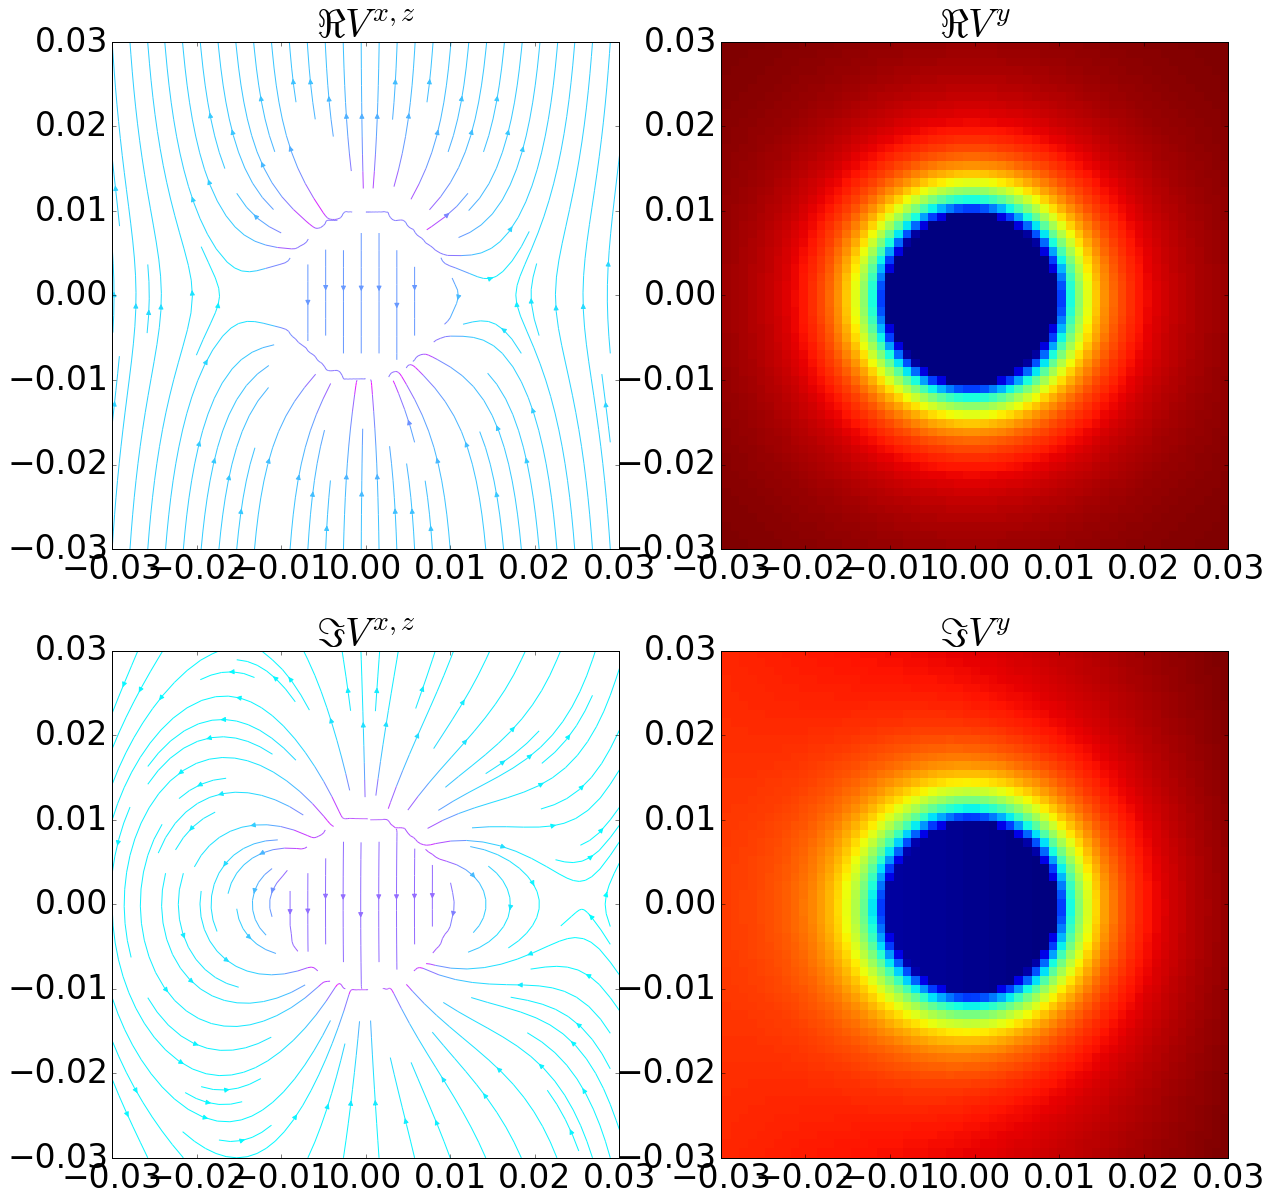

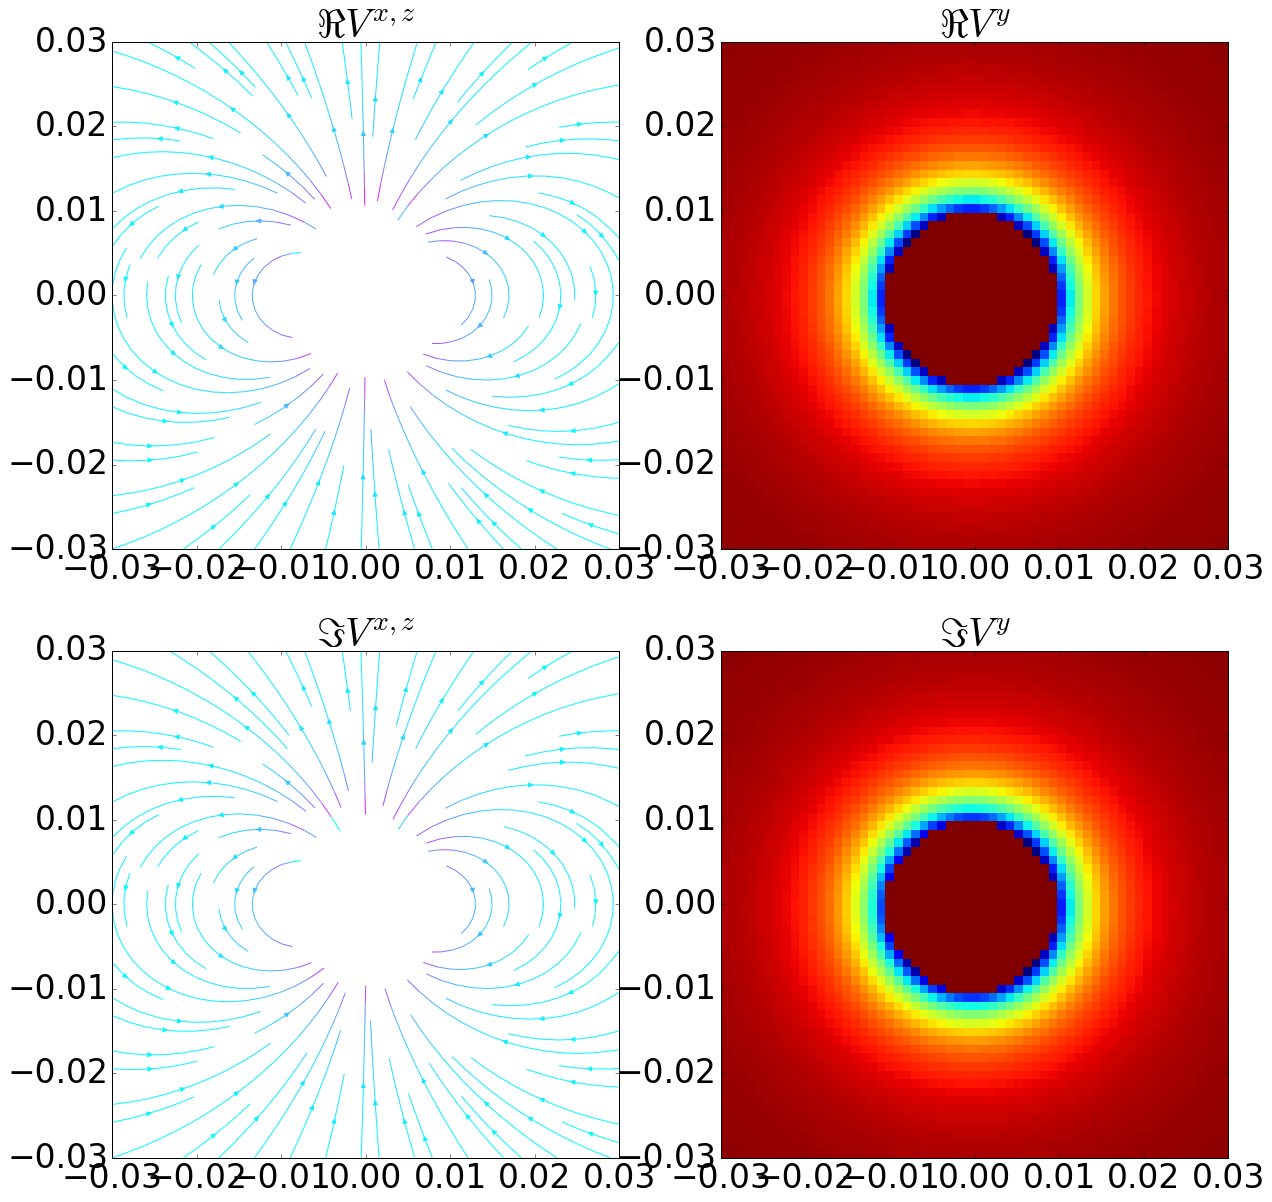

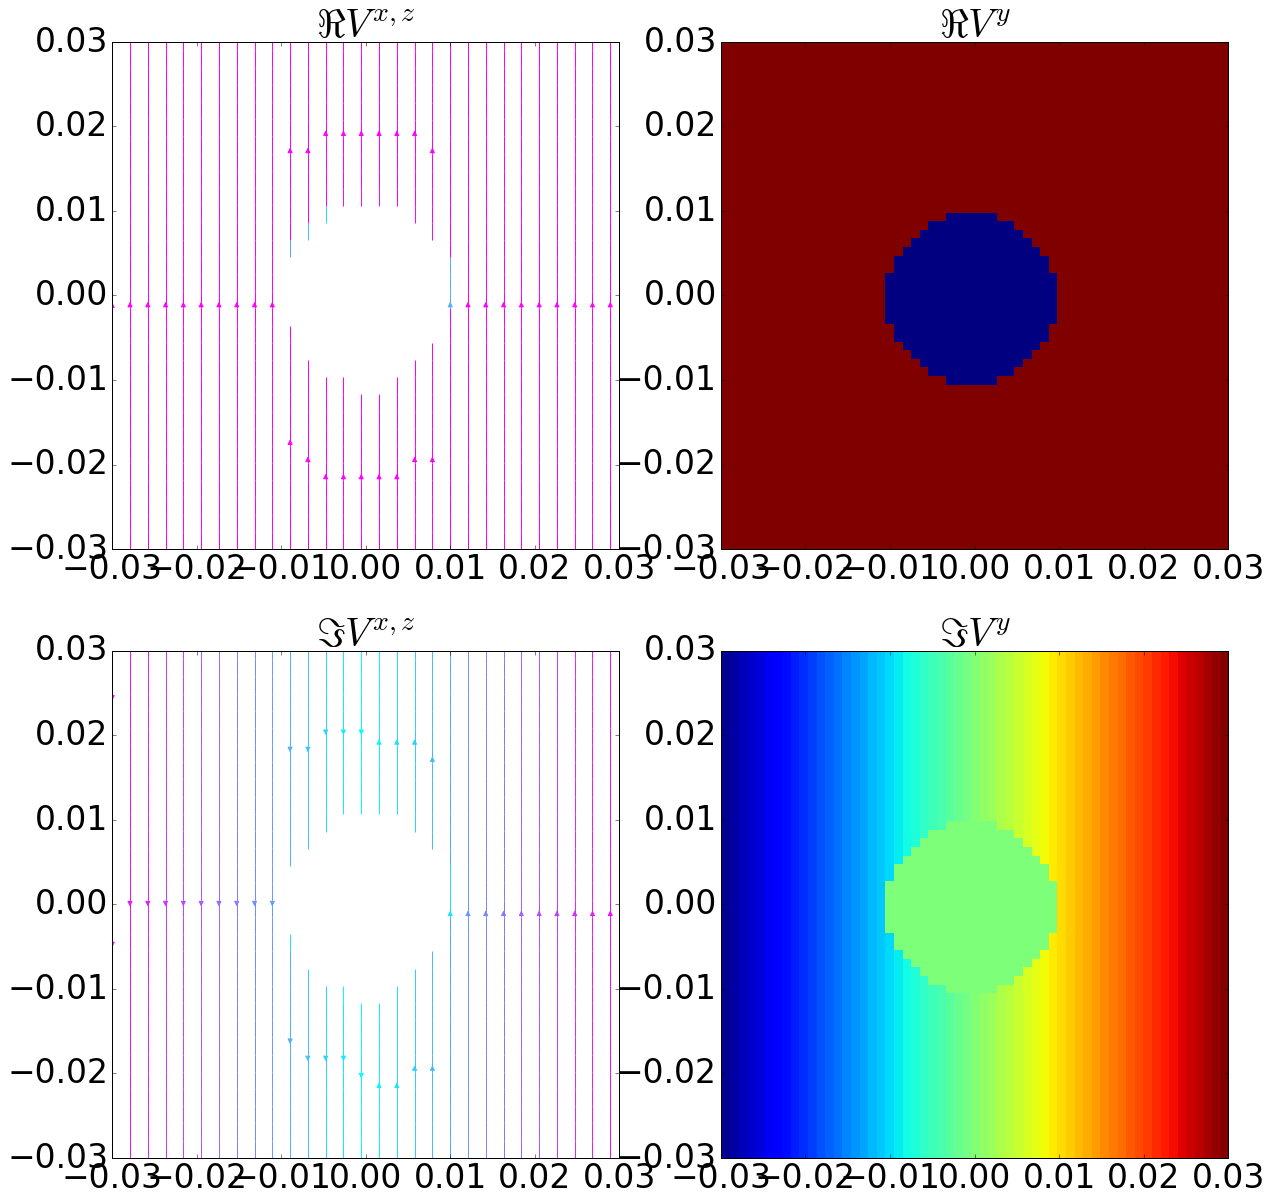

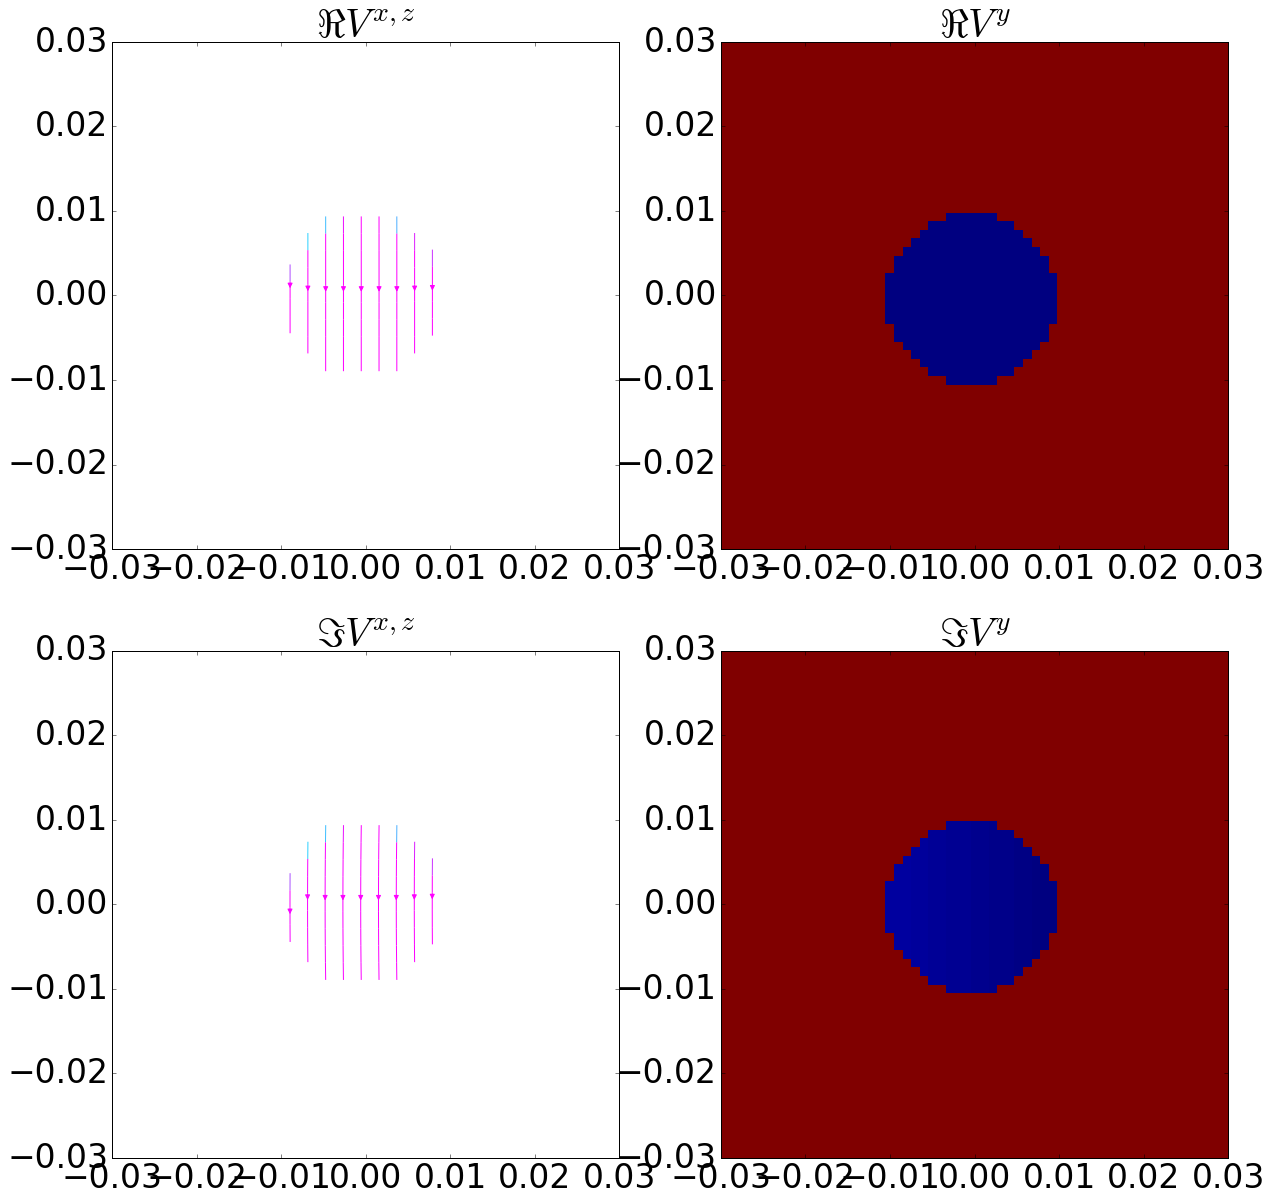

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
from qpms import *


nmax = 20
J_ext = 1
J_scat = 3
#ω = 4*eV/ℏ 
ε_in  = -3.3024390243902424+0.24695121951219506j
ε_out = 1
μ_in = 1
μ_out = 1

R = .01
k_in = cmath.sqrt(ε_in*μ_in)#ω*math.sqrt(ε_in)/c
k_out = math.sqrt(ε_out*μ_out)#ω*cmath.sqrt(ε_out)/c
k_cart = k_out * np.array([1,0,0]) 
E⃗_0 = np.array([0,1,1])

h2 = 3*R
w2 = 3*R
z = np.linspace(-h2,h2,60)
y = np.linspace(-w2,w2,60)
#y = [0]
#x,y,z = np.meshgrid(x,y,z)
x, z = np.meshgrid(y,z)
y = x*0.0

# which axes (cross-section) is to be plotted
hor_axis = 0
perp_axis = 1
ver_axis = 2

# Souřadnice a původní vlna
my, ny = get_mn_y(nmax)
nelem = len(my)

cartgrid = np.stack((x,y,z),axis=-1)
sphgrid = cart2sph(cartgrid)

E_plane = E⃗_0[:] * np.exp(1j*np.sum(k_cart[:]*cartgrid,axis=-1))[...,ň]


p_y, q_y = plane_pq_y(nmax, k_cart, E⃗_0)



M_sph_ry_in = np.zeros(x.shape+(nelem,3),dtype=np.complex_)
N_sph_ry_in = np.zeros(x.shape+(nelem,3),dtype=np.complex_)
M_sph_ry_scat = np.zeros(x.shape+(nelem,3),dtype=np.complex_)
N_sph_ry_scat = np.zeros(x.shape+(nelem,3),dtype=np.complex_)
M_sph_ry_ext = np.zeros(x.shape+(nelem,3),dtype=np.complex_)
N_sph_ry_ext = np.zeros(x.shape+(nelem,3),dtype=np.complex_)

for ri in np.ndindex(x.shape):
    if (sphgrid[ri+(0,)] < R):
        M, N = vswf_yr1(np.array([sphgrid[ri+(0,)]*k_in,sphgrid[ri+(1,)],sphgrid[ri+(2,)]]),nmax,J=1)
        M_sph_ry_in[ri] = M
        N_sph_ry_in[ri] = N
    else:
        M, N = vswf_yr1(np.array([sphgrid[ri+(0,)]*k_out,sphgrid[ri+(1,)],sphgrid[ri+(2,)]]),nmax,J=J_scat)
        M_sph_ry_scat[ri] = M
        N_sph_ry_scat[ri] = N
        M, N = vswf_yr1(np.array([sphgrid[ri+(0,)]*k_out,sphgrid[ri+(1,)],sphgrid[ri+(2,)]]),nmax,J=J_ext)
        M_sph_ry_ext[ri] = M
        N_sph_ry_ext[ri] = N
    
M_cart_ry_ext = sph_loccart2cart(M_sph_ry_ext, sphgrid[...,np.newaxis,:], axis=-1)
N_cart_ry_ext = sph_loccart2cart(N_sph_ry_ext, sphgrid[...,np.newaxis,:], axis=-1)
M_cart_ry_scat = sph_loccart2cart(M_sph_ry_scat, sphgrid[...,np.newaxis,:], axis=-1)
N_cart_ry_scat = sph_loccart2cart(N_sph_ry_scat, sphgrid[...,np.newaxis,:], axis=-1)
M_cart_ry_in = sph_loccart2cart(M_sph_ry_in, sphgrid[...,np.newaxis,:], axis=-1)
N_cart_ry_in = sph_loccart2cart(N_sph_ry_in, sphgrid[...,np.newaxis,:], axis=-1)


RH, RV, TH, TV = mie_coefficients(R, nmax,  #ω, ε_in, ε_out, μ_i=1, μ_e=1, 
                                  k_i=k_in, k_e=k_out,μ_i = μ_in, μ_e = μ_out,
                                  J_ext=J_ext, J_scat=J_scat)
a_y = p_y * RV[ny]
b_y = q_y * RH[ny]
d_y = p_y * TV[ny]
c_y = q_y * RH[ny]


E_int =  -1j*np.sum(+ d_y[ň,:,ň] * N_cart_ry_in  + c_y[ň,:,ň] * M_cart_ry_in, axis = -2)
E_scat=  +1j*np.sum(+ a_y[ň,:,ň] * N_cart_ry_scat+ b_y[ň,:,ň] * M_cart_ry_scat, axis = -2)
E_ext =  -1j*np.sum(+ p_y[ň,:,ň] * N_cart_ry_ext + q_y[ň,:,ň] * M_cart_ry_ext, axis = -2)
E_tot = E_int+E_scat+E_ext
#print(E_tot)

from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')

#page = 2
plthr = 1e-19
plthr_hi = 10
Ep = [E_tot,E_scat,E_ext,E_int]
for page in [0,1,2,3]:
    plotfield = Ep[page]
    plotfield[np.abs(plotfield.real)<plthr]=1j*plotfield[np.abs(plotfield.real)<plthr].imag
    plotfield[np.abs(plotfield.imag)<plthr]=plotfield[np.abs(plotfield.imag)<plthr].real
    plotfield[np.abs(plotfield.real)>plthr_hi]=1j*plotfield[np.abs(plotfield.real)>plthr_hi].imag
    plotfield[np.abs(plotfield.imag)>plthr_hi]=plotfield[np.abs(plotfield.imag)>plthr_hi].real
    f, axarr = plt.subplots(2, 2, figsize=(20,20))
    print("max|Re Vx| =",np.max(np.abs(plotfield[...,hor_axis].real)),
          "; max|Re Vy| =",np.max(np.abs(plotfield[...,perp_axis].real)),
          "; max|Re Vz| =",np.max(np.abs(plotfield[...,ver_axis].real)))
    print("max|Im Vx| =",np.max(np.abs(plotfield[...,hor_axis].imag)),
          "; max|Im Vy| =",np.max(np.abs(plotfield[...,perp_axis].imag)),
          "; max|Im Vz| =",np.max(np.abs(plotfield[...,ver_axis].imag)))
    fieldmax = np.max(np.linalg.norm(plotfield[...,(hor_axis,ver_axis)], axis=-1))
    #axarr[0,0].quiver(cartgrid[...,hor_axis], cartgrid[...,ver_axis],
    #                 plotfield[...,hor_axis].real, plotfield[...,ver_axis].real,pivot='middle')
    strengthl = np.log(np.linalg.norm(plotfield[...,(hor_axis,ver_axis)].real, axis=-1)/fieldmax + 1.11) # +plthr to avoid log(0)
    axarr[0,0].streamplot(cartgrid[...,hor_axis], cartgrid[...,ver_axis],
                      plotfield[...,hor_axis].real, plotfield[...,ver_axis].real, color = strengthl, #linewidth = 5*strengthl,
                       cmap=plt.cm.cool,  )
    axarr[0,0].set_title("$\Re V^{x,z}$")
    axarr[0,0].set_xlim(-w2,w2)
    axarr[0,0].set_ylim(-h2,h2)
    axarr[0,1].scatter(cartgrid[...,hor_axis], cartgrid[...,ver_axis],s=220,
                       edgecolors='none',
                       c=plotfield[...,perp_axis].real,marker='s')
    axarr[0,1].set_xlim(-w2,w2)
    axarr[0,1].set_ylim(-h2,h2)
    axarr[0,1].set_title("$\Re V^y$")
    #axarr[1,0].quiver(cartgrid[...,hor_axis], cartgrid[...,ver_axis],
    #                  plotfield[...,hor_axis].imag, plotfield[...,ver_axis].imag,pivot='middle')
    strengthl = np.log(np.linalg.norm(plotfield[...,(hor_axis,ver_axis)].imag, axis=-1)/fieldmax + 1.11) # +plthr to avoid log(0)
    axarr[1,0].streamplot(cartgrid[...,hor_axis], cartgrid[...,ver_axis],
                      plotfield[...,hor_axis].imag, plotfield[...,ver_axis].imag, color=strengthl, # linewidth = 1,
                       cmap=plt.cm.cool,  )
    axarr[1,0].set_title("$\Im V^{x,z}$")
    axarr[1,0].set_xlim(-w2,w2)
    axarr[1,0].set_ylim(-h2,h2)
    axarr[1,1].scatter(cartgrid[...,hor_axis], cartgrid[...,ver_axis],s=220,
                       edgecolors='none',
                       c=plotfield[...,perp_axis].imag,marker='s')
    axarr[1,1].set_xlim(-w2,w2)
    axarr[1,1].set_ylim(-h2,h2)
    axarr[1,1].set_title("$\Im V^y$")
    #f.suptitle("$M_{"+str(my[page])+"}^{"+str(ny[page])+"(1)}$ (yz plane)",fontsize='x-large')
    matplotlib.rcParams.update({'font.size': 33})

    pp.savefig()
pp.close()
